In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
import pylab
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

#functions
def vel_simples(r,R0,cte):
    return np.sqrt(cte * R0**2 * (1-R0/r*np.arctan(r/R0)) )
def vel_NFW(r,R0,cte):
    return  np.sqrt(cte * R0**3/r * ( np.log(1+r/R0) - r/(R0+r) ) )
def chi_test(obs,expt,error):
    return np.sum((obs-expt)**2/error**2)
def chi_test_degrees(obs,expt,error,params=3):
    return np.sum((obs-expt)**2/error**2)/(len(obs)-params)
def residuals(obs,expt):
    return obs-expt

In [50]:
def fit(folder_name):
    
    #lendo arquivo
    df = pd.read_csv('/home/victor/Desktop/Code/IC/data/'+folder_name+'_with_errors.csv',sep = ',')
    df = df.drop(df.columns[[0]],axis=1)

    results = [[],[]]
    
    #chute inicial proporcional ao valor mediano de velocidade
    g = [df['vel'][int(len(df)/2)]/100,df['vel'][int(len(df)/2)]*50]

    #simple model
    try:
        popt_simples,pcov = curve_fit(vel_simples,df['rad'],df['vel'],g,sigma=df['vel_error'],absolute_sigma=True)
        yfit_simples = vel_simples(df['rad'],*popt_simples) #parameter fit
        chi_test_simples = chi_test(df['vel'],[vel_simples(r,*popt_simples) for r in df['rad']],df['vel_error'])
        chi_degrees_simples = chi_test_degrees(df['vel'],[vel_simples(r,*popt_simples) for r in df['rad']],df['vel_error'])
        residuals_simples = residuals(df['vel'],[vel_simples(r,*popt_simples) for r in df['rad']]) 
    except:
        popt_simples = [None,None]
        yfit_simples = [None]*len(df['rad'])
        chi_test_simples = None
        chi_degrees_simples = None
        residuals_simples = [None]*len(df['rad'])


    #NFW model
    try:
        popt_NFW,pcov = curve_fit(vel_NFW,df['rad'],df['vel'],g,sigma=df['vel_error'],absolute_sigma=True)
        yfit_NFW = vel_NFW(df['rad'],*popt_NFW) #parameter fit
        chi_test_NFW = chi_test(df['vel'],[vel_NFW(r,*popt_NFW) for r in df['rad']],df['vel_error'])
        chi_degrees_NFW = chi_test_degrees(df['vel'],[vel_NFW(r,*popt_NFW) for r in df['rad']],df['vel_error'])
        residuals_NFW = residuals(df['vel'],[vel_NFW(r,*popt_NFW) for r in df['rad']])
    except:
        popt_NFW = [None,None]
        yfit_NFW = [None]*len(df['rad'])
        chi_test_NFW = None
        chi_degrees_NFW = None
        residuals_NFW = [None]*len(df['rad'])
        


    #plot 
    plt.figure(figsize=(16,9))
    plt.title(folder_name.upper(),fontsize=40)

    plt.xlabel("Raio (kpc)",fontsize=30)
    plt.ylabel("Velocidade (km s⁻¹)",fontsize=30)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    #chi = mpatches.Patch(color='red',label='chi_test: '+str(chi_test_simples))
    #R0 = mpatches.Patch(color='green',label='R0: '+str(popt[0]))
    #cte = mpatches.Patch(color='green',label='cte: '+str(popt[1]))
    #plt.legend(handles=[chi,R0,cte],fontsize='xx-large',loc='upper left')

    plt.errorbar(df['rad'],df['vel'],yerr=df['vel_error'],fmt='o',color='black')
    plt.plot(df['rad'],yfit_simples,label="eq. (4)",color='orange')
    plt.plot(df['rad'],yfit_NFW,label="NFW",color='blue')
    plt.legend(fontsize='xx-large',loc='lower right') #loc='lower right' para NGC2903 e NGC6503
    plt.show()
    
    #residuals
    plt.figure(figsize=(16,9))
    plt.title(folder_name.upper()+": resíduos e teste qui quadrado",fontsize=40)
    
    plt.xlabel("Raio (kpc)",fontsize=30)
    plt.ylabel("Resíduo (km s⁻¹)",fontsize=30)
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    try:
        max_y = max(abs(max(residuals_simples,key=abs)),abs(max(residuals_NFW,key=abs)))*1.5
        plt.ylim(-max_y,max_y)
        
        plt.text(df['rad'][0],max_y*0.9,'qui eq.(4): '+str(round(chi_test_simples,2)),fontsize=15)
        plt.text(df['rad'][0],max_y*0.8,'qui eq.(4) com graus: '+str(round(chi_degrees_simples,2)),fontsize=15)
        plt.text(df['rad'][0],-max_y*0.8,'qui NFW: '+str(round(chi_test_NFW,2)),fontsize=15)
        plt.text(df['rad'][0],-max_y*0.9,'qui NFW com graus: '+str(round(chi_degrees_NFW,2)),fontsize=15)
        
    except:
        pass
    
    #plt.text(df['rad'][0],10,'qui eq.(4): '+str(chi_test_simples),fontsize=15)
    #plt.text(df['rad'][0],8,'qui eq.(4) com graus: '+str(chi_degrees_simples),fontsize=15)
    #plt.text(df['rad'][0],-8,'qui NFW: '+str(chi_test_NFW),fontsize=15)
    #plt.text(df['rad'][0],-10,'qui NFW com graus: '+str(chi_degrees_NFW),fontsize=15)
    
    plt.scatter(df['rad'],residuals_simples,label="eq. (4)",color='orange')
    plt.scatter(df['rad'],residuals_NFW,label="NFW",color='blue')
    plt.plot(df['rad'],[0]*len(df['rad']),color='black')
    plt.legend(fontsize='xx-large',loc='upper right') #loc='lower right' para NGC2903 e NGC6503
    plt.show()

    return [ [chi_test_simples,chi_degrees_simples,*popt_simples] , [chi_test_NFW,chi_degrees_NFW,*popt_NFW] ]

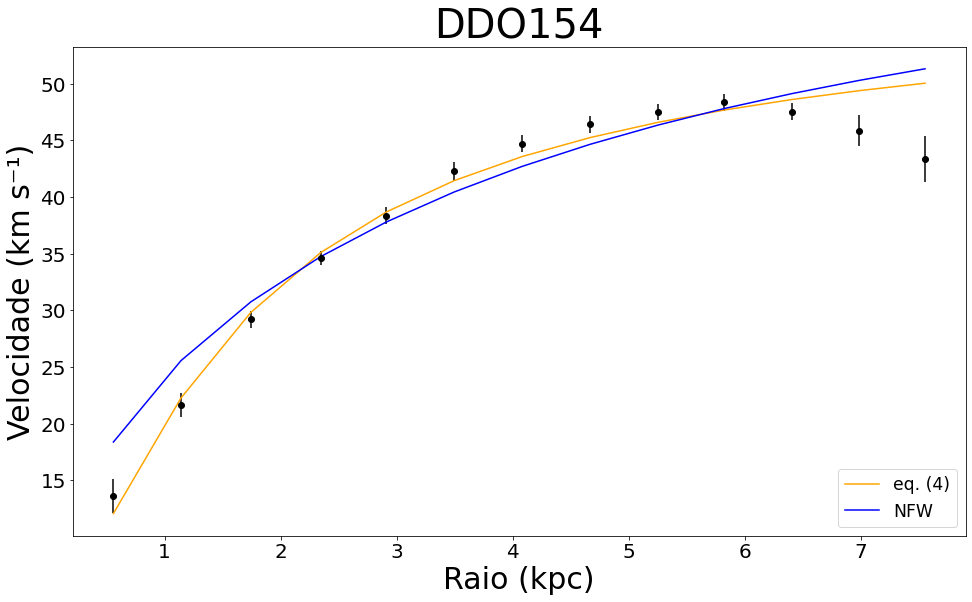

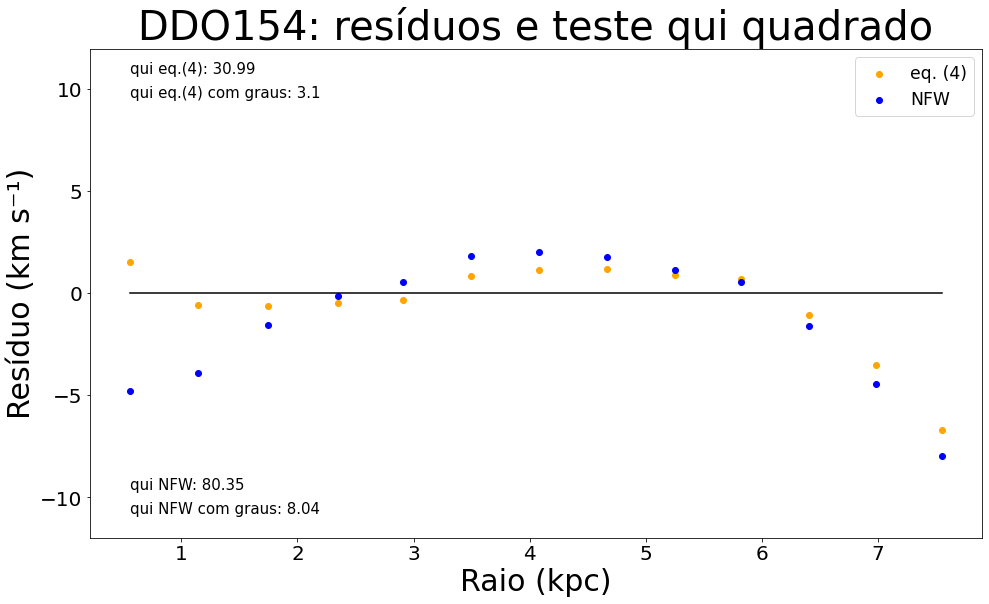

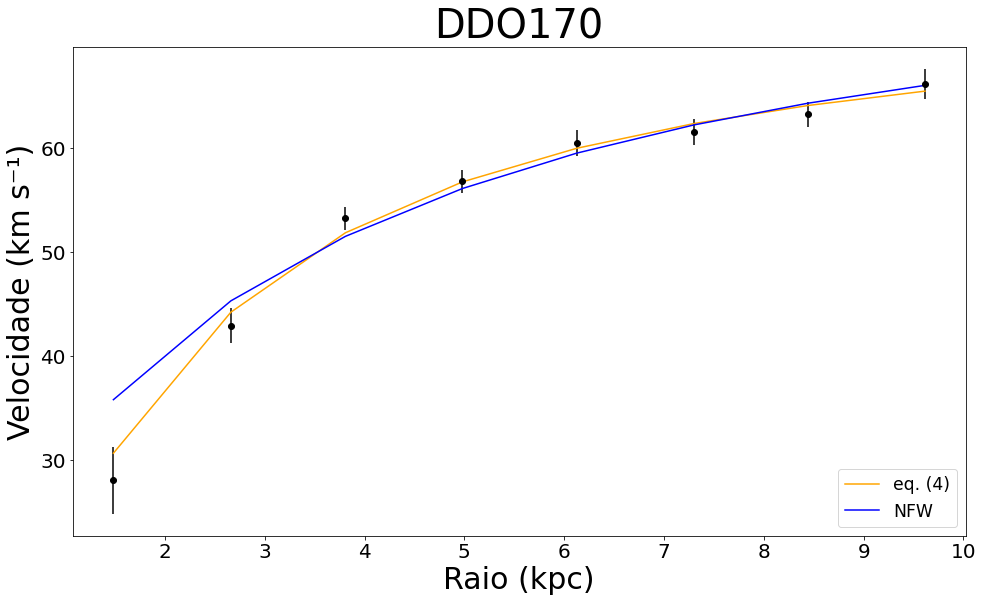

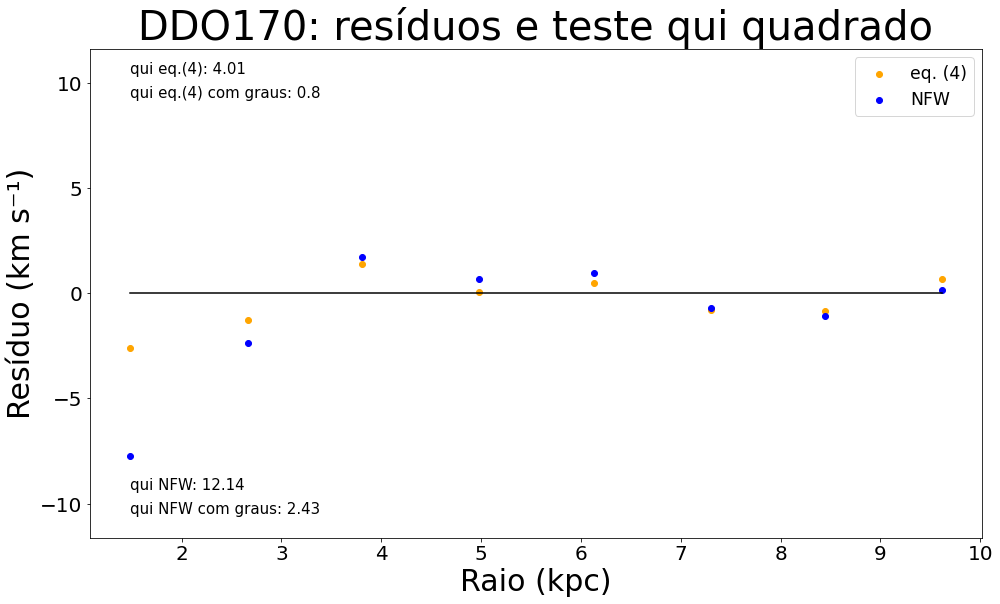

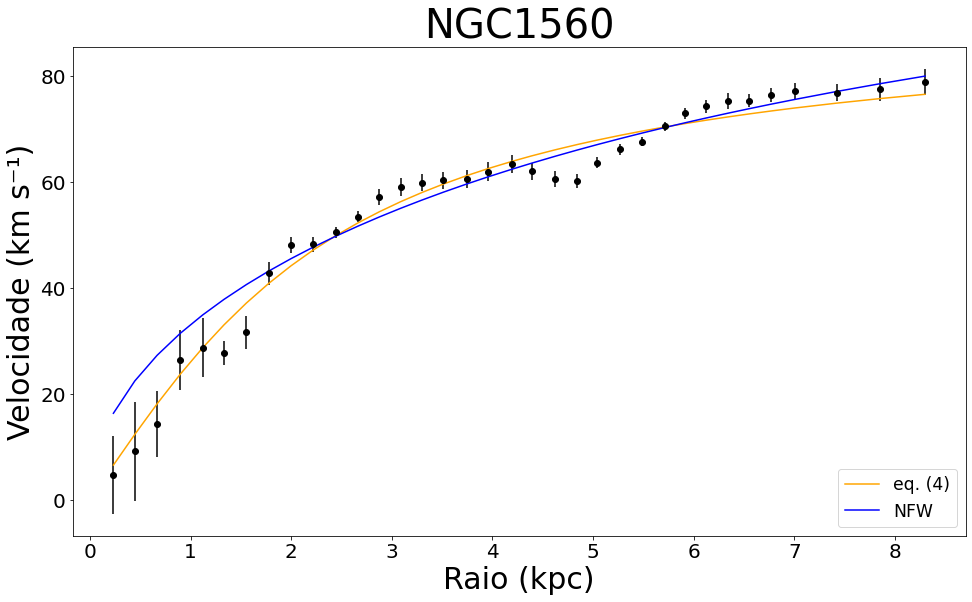

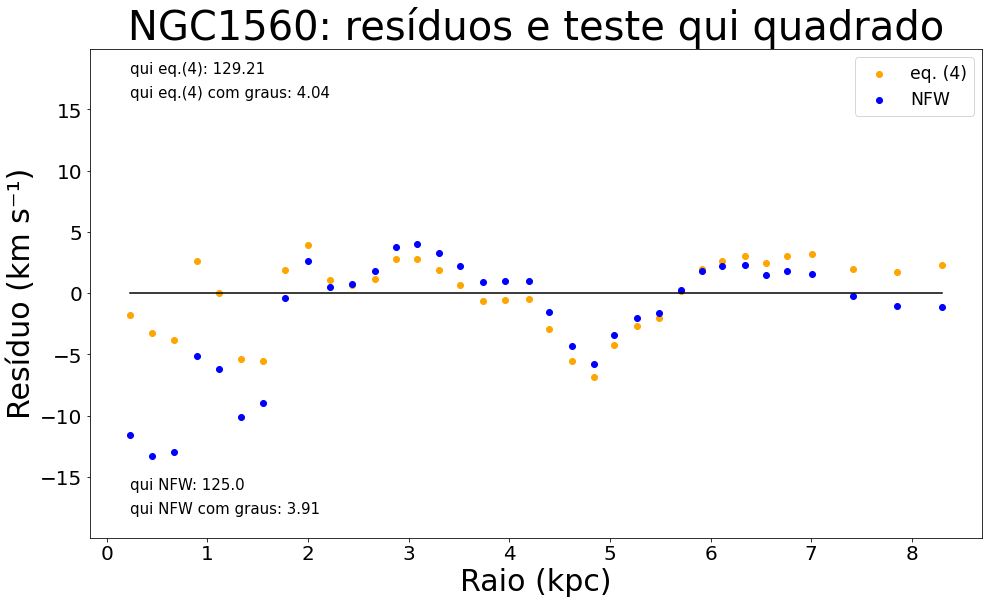

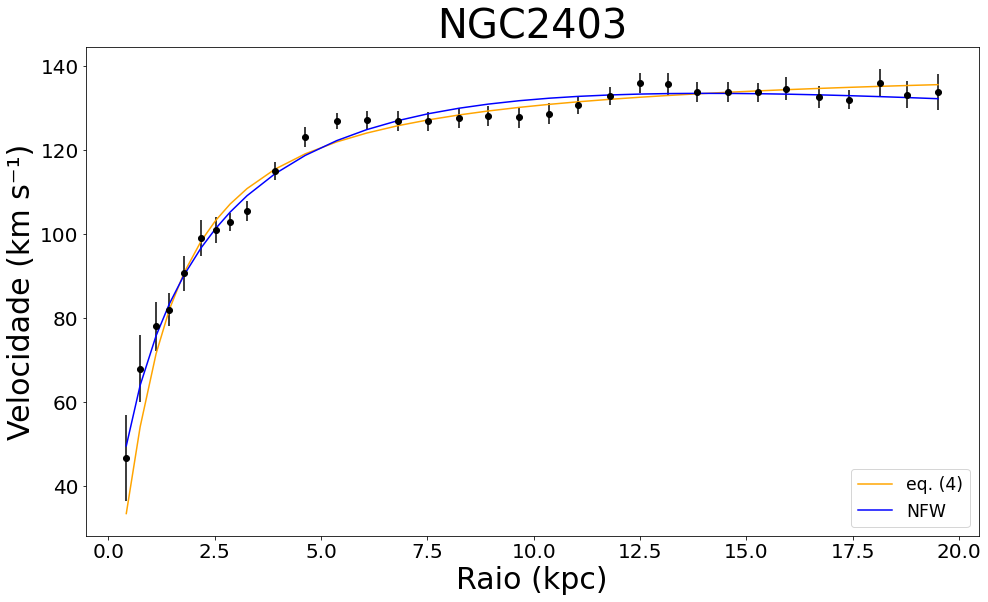

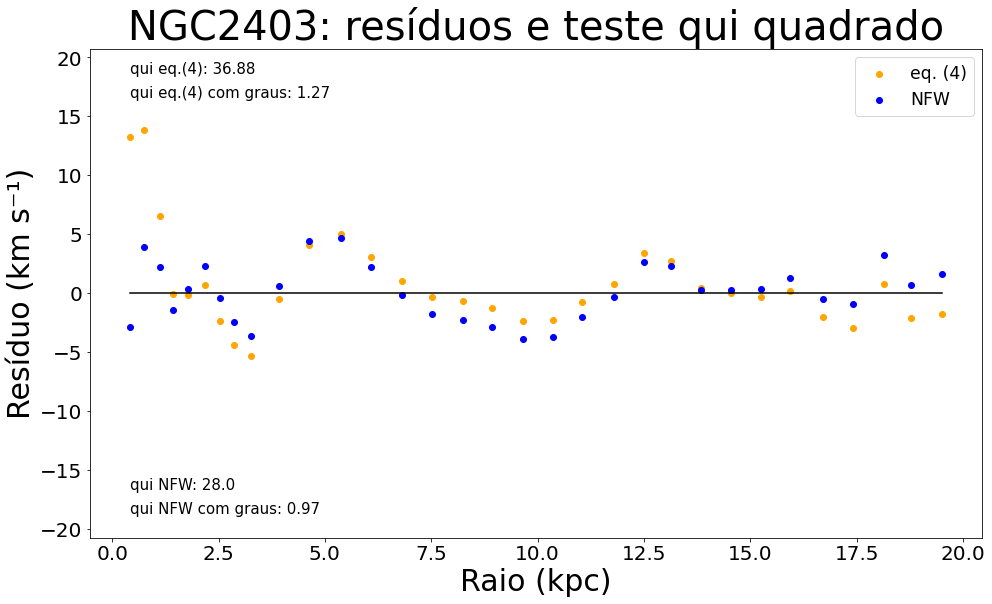

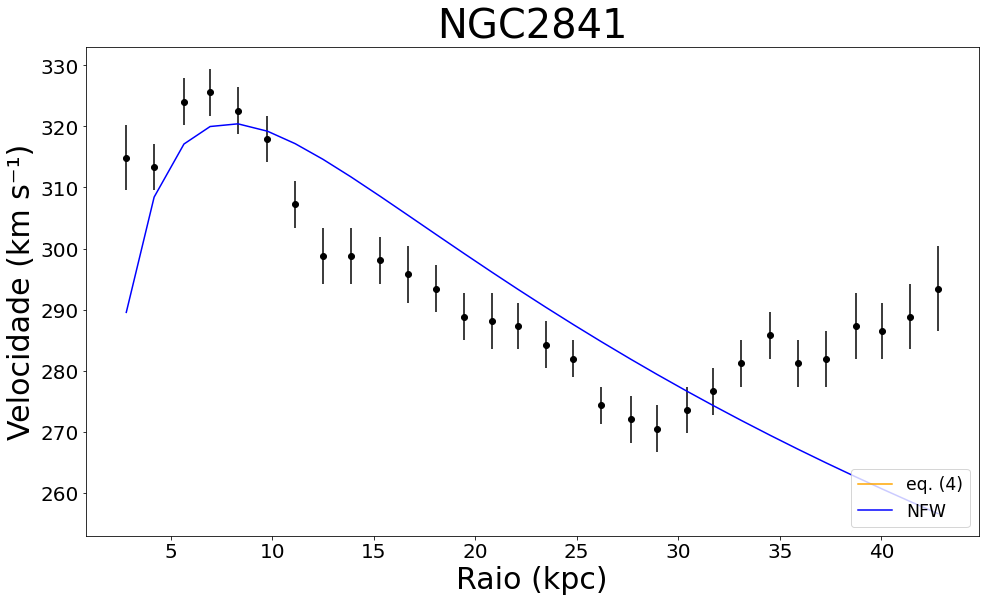

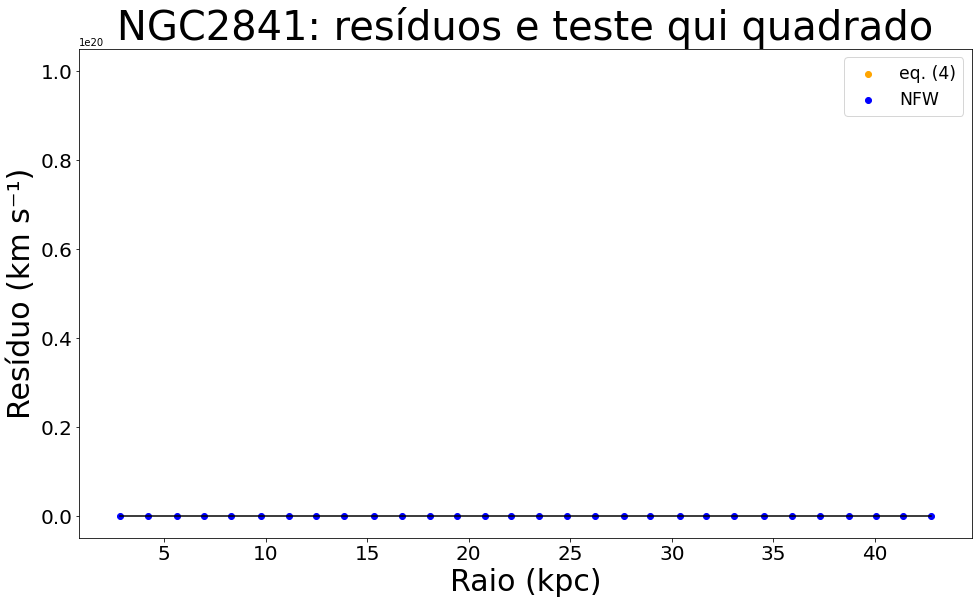

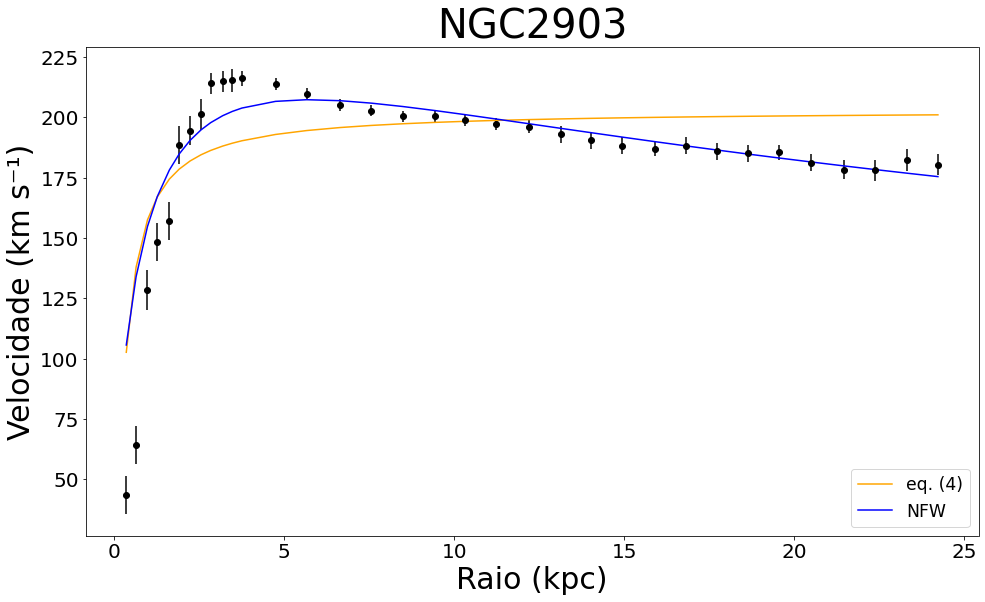

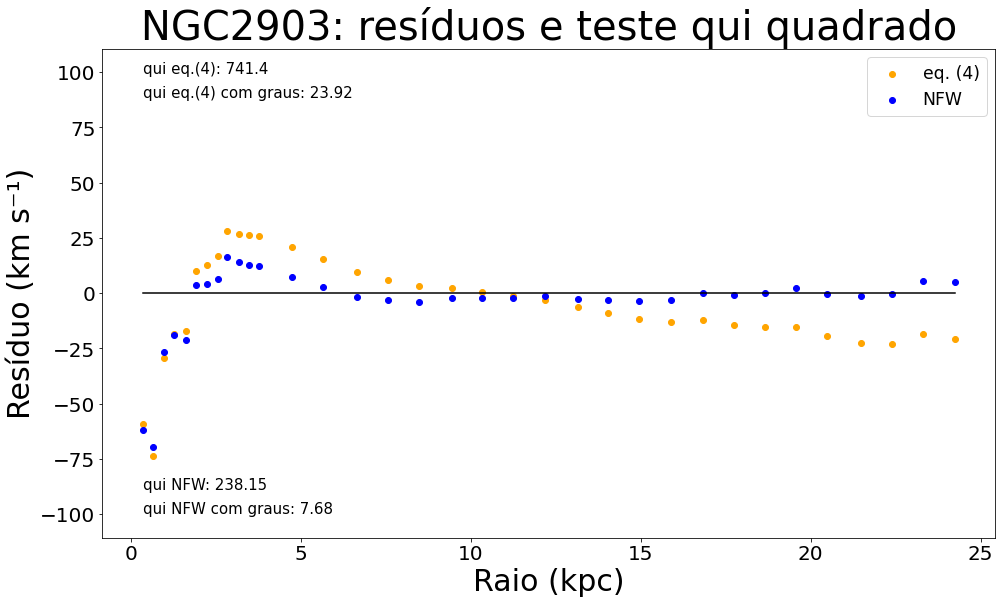

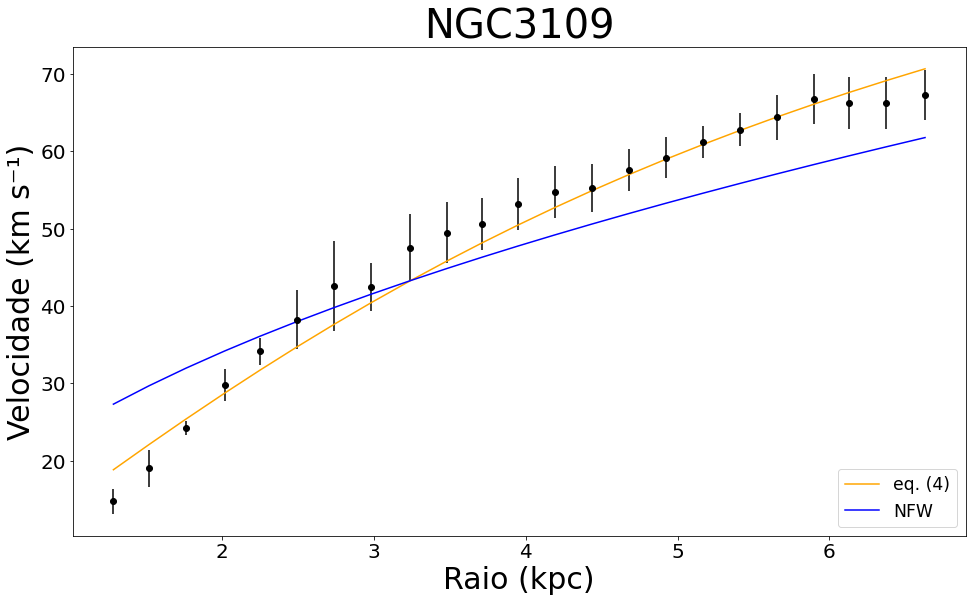

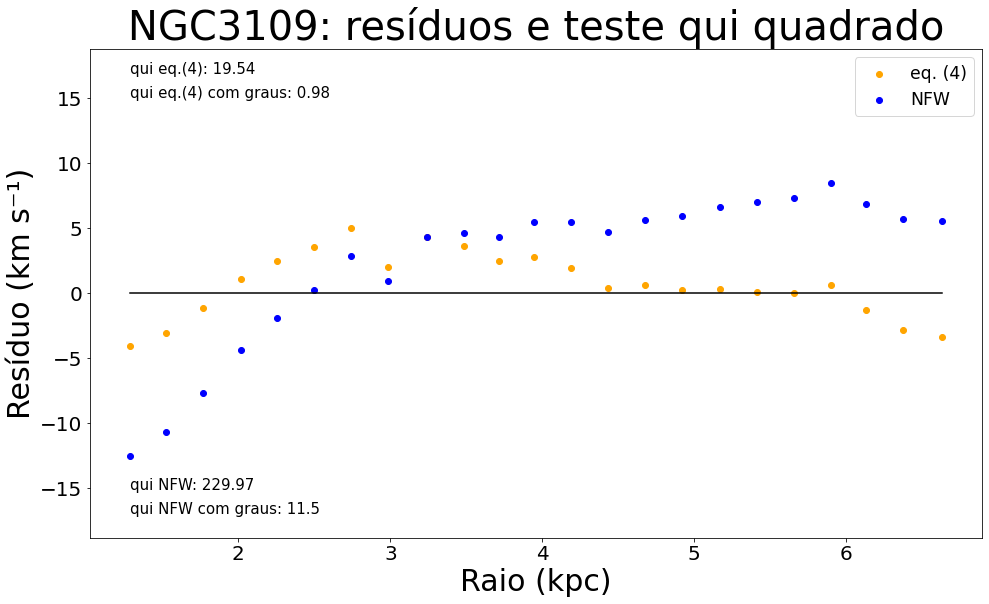

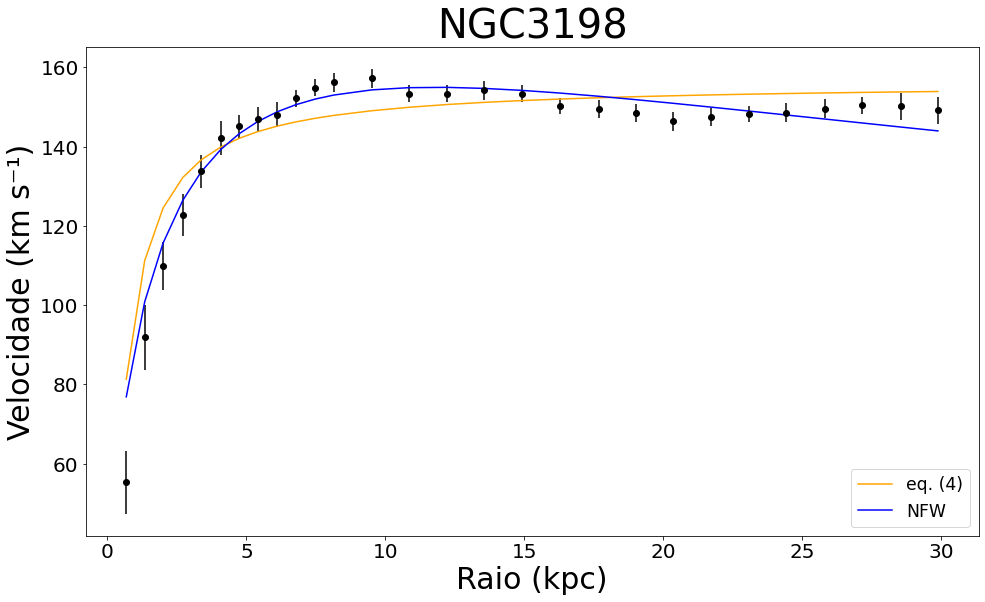

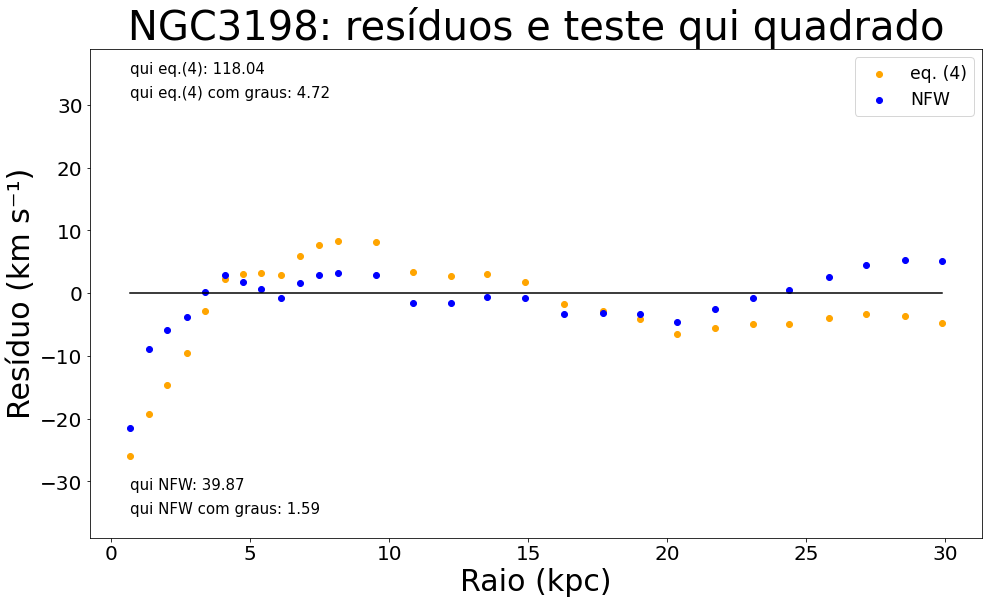

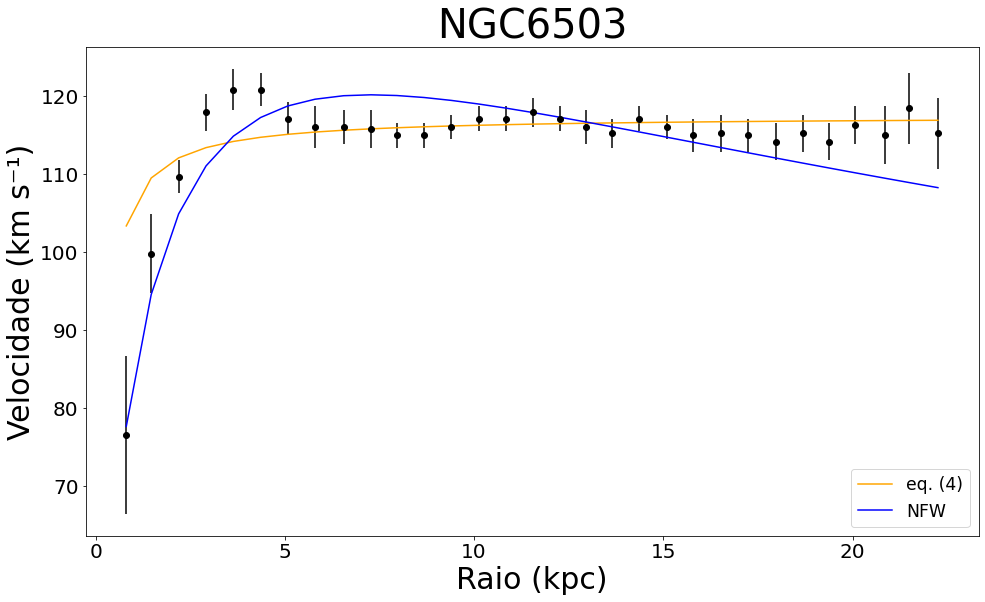

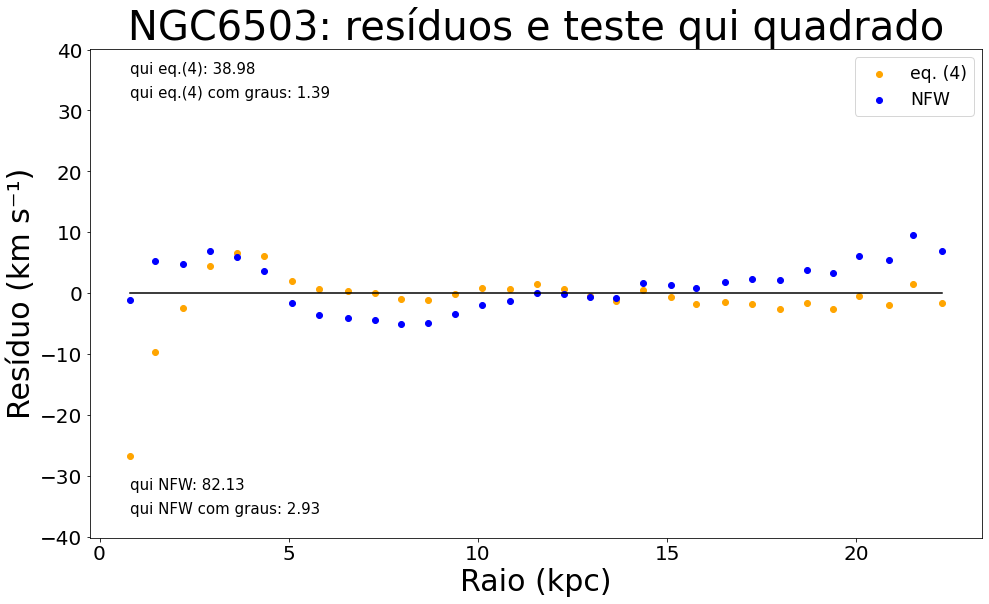

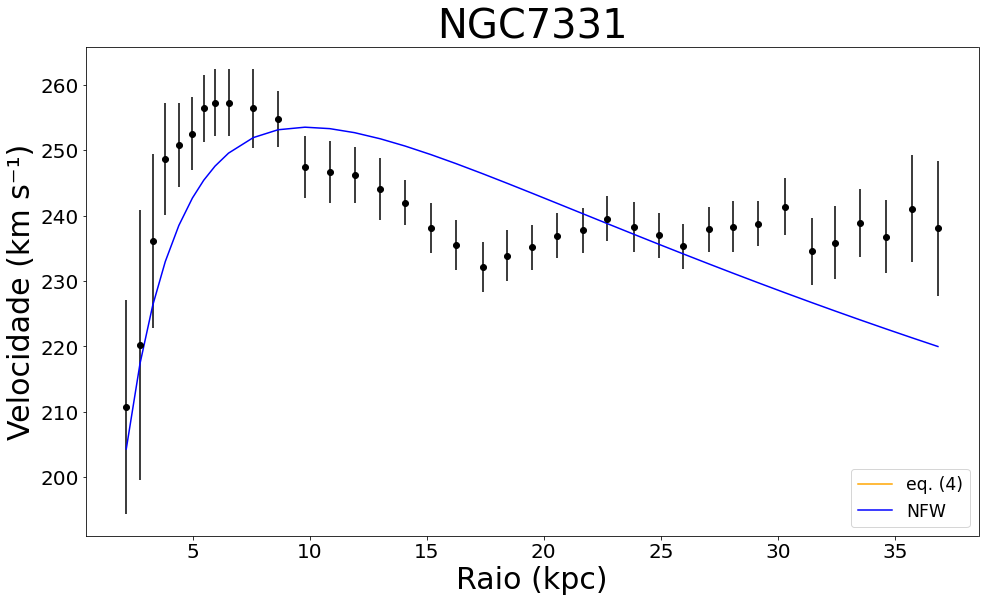

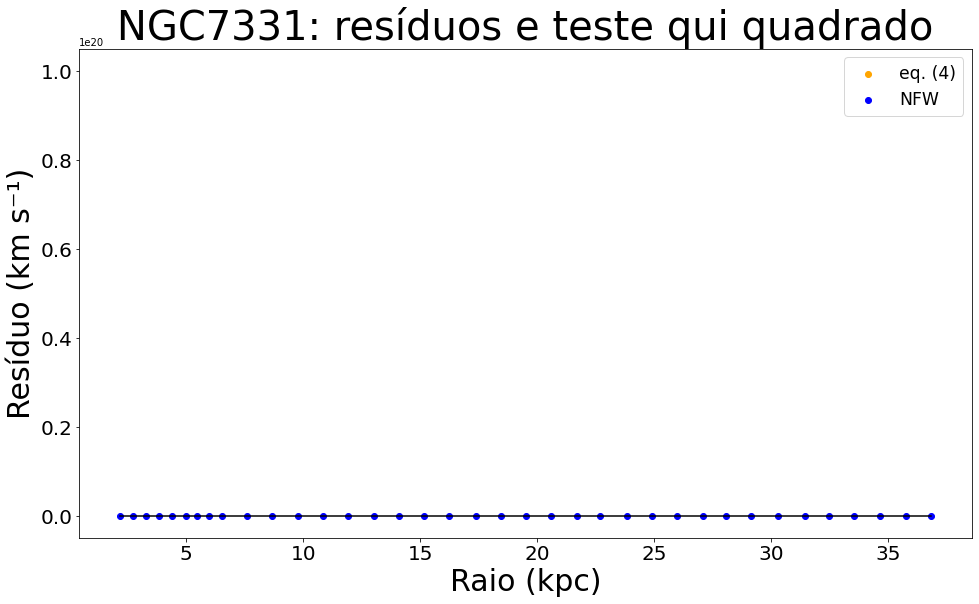

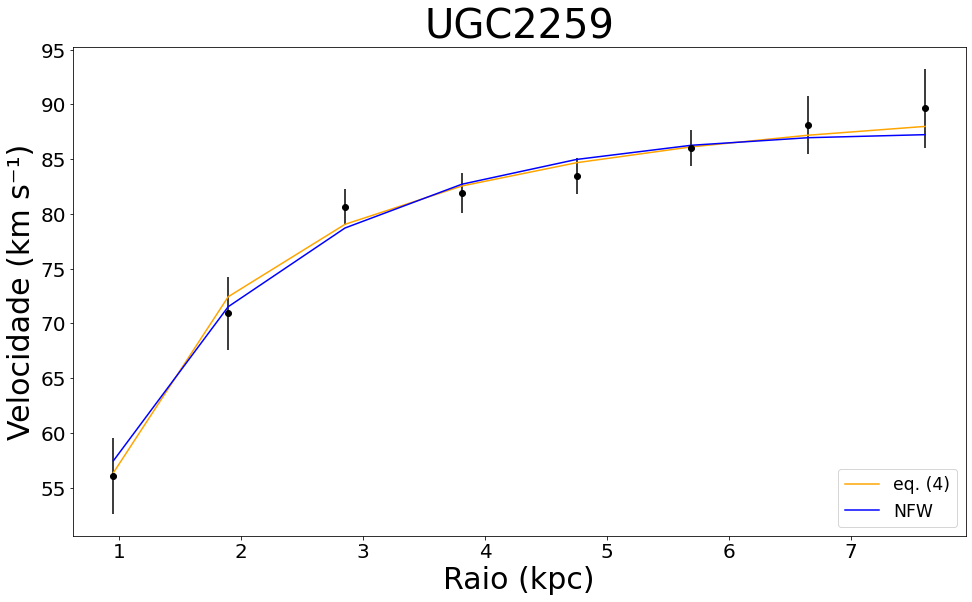

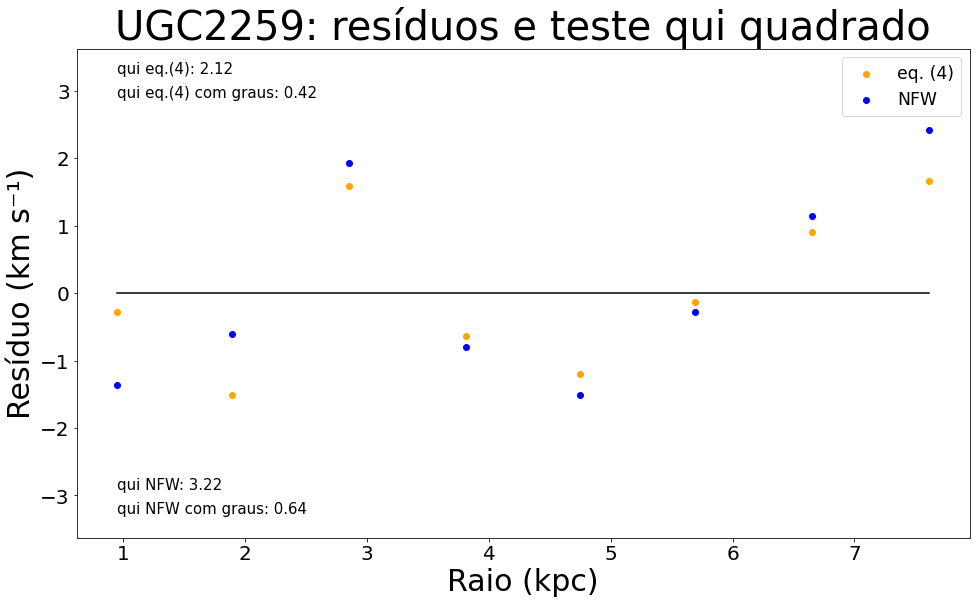

In [51]:
galaxies = ['ddo154','ddo170','ngc1560','ngc2403','ngc2841','ngc2903','ngc3109','ngc3198','ngc6503','ngc7331','ugc2259']
values_simples = []
values_NFW = []

for galaxy in galaxies:
    results = fit(galaxy)
    values_simples.append(results[0])
    values_NFW.append(results[1])

In [16]:
galaxies = [galaxy.upper() for galaxy in galaxies]
data_simples = pd.DataFrame(np.column_stack((galaxies,values_simples)),columns=['galaxy','chi_eq.(4)','chi_deg_eq.(4)','R0_eq.(4)','P0_eq.(4)'])
data_NFW = pd.DataFrame(np.column_stack((galaxies,values_NFW)),columns=['galaxy','chi_NFW','chi_deg_NFW','R0_NFW','P0_NFW'])

data = data_simples
data['chi_NFW'] = data_NFW['chi_NFW']
data['chi_deg_NFW'] = data_NFW['chi_deg_NFW']
data['R0_NFW'] = data_NFW['R0_NFW']
data['P0_NFW'] = data_NFW['P0_NFW']
data = data.reindex(['galaxy','chi_eq.(4)','chi_deg_eq.(4)','chi_NFW','chi_deg_NFW','R0_eq.(4)','R0_NFW','P0_eq.(4)','P0_NFW'],axis=1)
data = data.set_index('galaxy')
data

,chi_eq.(4),chi_deg_eq.(4),chi_NFW,chi_deg_NFW,R0_eq.(4),R0_NFW,P0_eq.(4),P0_NFW
galaxy,,,,,,,,
DDO154,30.985365,3.098537,80.35362156264699,8.0353621562647,1.509617,13.4421887749628,1514.181177,95.02094238414803
DDO170,4.006729,0.801346,12.141398793703486,2.4282797587406972,1.818591,12.156382656355577,1757.405646,165.5287617827741
NGC1560,129.210897,4.037841,125.00295658332114,3.9063423932287855,1.890981,23.8116905300892,2360.472911,96.8115478070958
NGC2403,36.884732,1.271887,27.9955443858423,0.9653635995118035,0.973820,6.502498987189917,20995.105609,1951.4299305259228
NGC2841,None,None,282.4598608104696,10.461476326313688,None,3.661261557801638,None,35440.90254566127
NGC2903,741.397168,23.916038,238.14520696432908,7.682103450462228,0.306869,2.6512726163758527,437832.014258,28278.375556428146
NGC3109,19.535299,0.976765,229.96908240602576,11.498454120301288,4.947961,1373.9918630742252,666.506994,0.8435524916515883
NGC3198,118.039713,4.721589,39.86773248844107,1.5947092995376428,0.562958,5.442565020082484,76970.465340,3748.620330604505
NGC6503,38.978091,1.392075,82.12501646229428,2.933036302224796,-0.129380,3.357761794103981,823323.742711,5919.9127546719055


In [17]:
galaxies = [galaxy.upper() for galaxy in galaxies]
data_simples = pd.DataFrame(np.column_stack((galaxies,values_simples)),columns=['galaxy','chi_eq.(4)','chi_deg_eq.(4)','R0_eq.(4) [kpc]','P0_eq.(4) [km.s⁻¹.kpc⁻¹]'])
data_NFW = pd.DataFrame(np.column_stack((galaxies,values_NFW)),columns=['galaxy','chi_NFW','chi_deg_NFW','R0_NFW [kpc]','P0_NFW [km.s⁻¹.kpc⁻¹]'])

data = data_simples
data['chi_NFW'] = data_NFW['chi_NFW']
data['chi_deg_NFW'] = data_NFW['chi_deg_NFW']
data['R0_NFW [kpc]'] = data_NFW['R0_NFW [kpc]']
data['P0_NFW [km.s⁻¹.kpc⁻¹]'] = data_NFW['P0_NFW [km.s⁻¹.kpc⁻¹]']
data = data.reindex(['galaxy','chi_eq.(4)','chi_deg_eq.(4)','chi_NFW','chi_deg_NFW','R0_eq.(4) [kpc]','R0_NFW [kpc]','P0_eq.(4) [km.s⁻¹.kpc⁻¹]','P0_NFW [km.s⁻¹.kpc⁻¹]'],axis=1)
data = data.set_index('galaxy')
data = data.astype(float)
pd.set_option('display.float_format', '{:.4g}'.format)
data

,chi_eq.(4),chi_deg_eq.(4),chi_NFW,chi_deg_NFW,R0_eq.(4) [kpc],R0_NFW [kpc],P0_eq.(4) [km.s⁻¹.kpc⁻¹],P0_NFW [km.s⁻¹.kpc⁻¹]
galaxy,,,,,,,,
DDO154,30.99,3.099,80.35,8.035,1.51,13.44,1514,95.02
DDO170,4.007,0.8013,12.14,2.428,1.819,12.16,1757,165.5
NGC1560,129.2,4.038,125,3.906,1.891,23.81,2360,96.81
NGC2403,36.88,1.272,28,0.9654,0.9738,6.502,2.1e+04,1951
NGC2841,NaN,NaN,282.5,10.46,NaN,3.661,NaN,3.544e+04
NGC2903,741.4,23.92,238.1,7.682,0.3069,2.651,4.378e+05,2.828e+04
NGC3109,19.54,0.9768,230,11.5,4.948,1374,666.5,0.8436
NGC3198,118,4.722,39.87,1.595,0.563,5.443,7.697e+04,3749
NGC6503,38.98,1.392,82.13,2.933,-0.1294,3.358,8.233e+05,5920


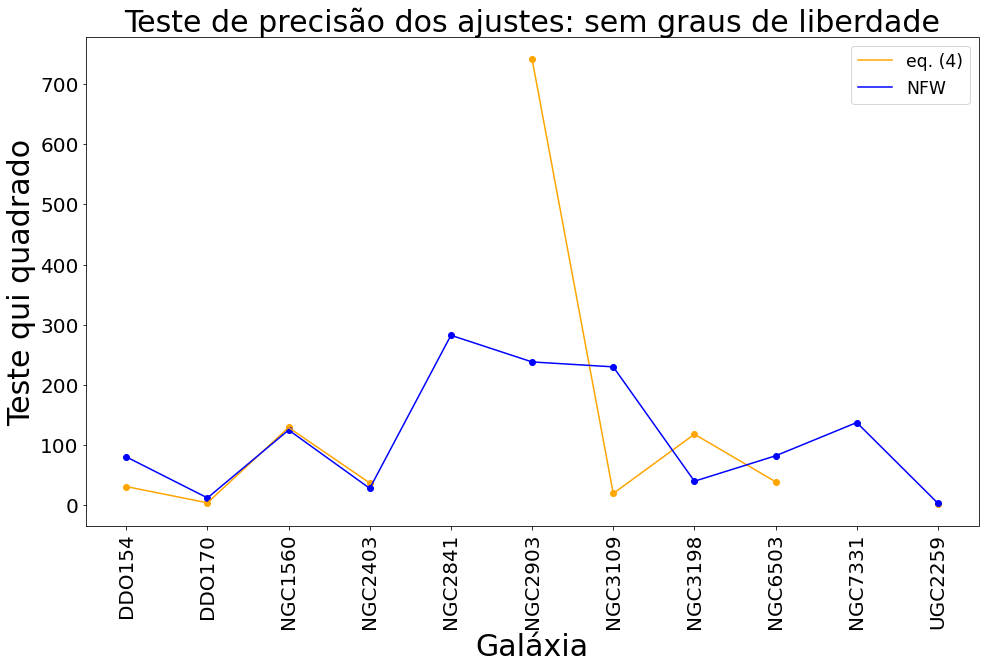

In [18]:
plt.figure(figsize=(16,9))
plt.plot(np.arange(11),[float(x) if x else None for x in data_simples["chi_eq.(4)"]],label="eq. (4)",color='orange')
plt.scatter(np.arange(11),[float(x) if x else None for x in data_simples["chi_eq.(4)"]],color='orange')
plt.plot(np.arange(11),[float(x) if x else None for x in data_NFW["chi_NFW"]],label="NFW",color='blue')
plt.scatter(np.arange(11),[float(x) if x else None for x in data_NFW["chi_NFW"]],color='blue')
plt.legend(fontsize='xx-large')
plt.title("Teste de precisão dos ajustes: sem graus de liberdade",fontsize=30)
plt.xlabel("Galáxia",fontsize=30)
plt.ylabel("Teste qui quadrado",fontsize=30)
plt.xticks(range(len(galaxies)),galaxies,rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

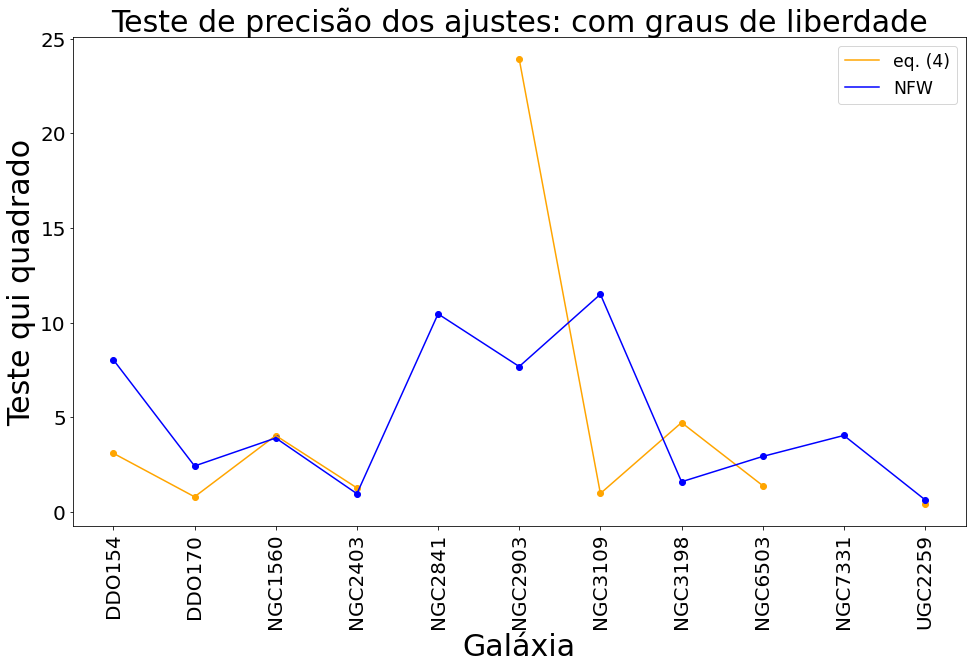

In [19]:
plt.figure(figsize=(16,9))
plt.plot(np.arange(11),[float(x) if x else None for x in data_simples["chi_deg_eq.(4)"]],label="eq. (4)",color='orange')
plt.scatter(np.arange(11),[float(x) if x else None for x in data_simples["chi_deg_eq.(4)"]],color='orange')
plt.plot(np.arange(11),[float(x) if x else None for x in data_NFW["chi_deg_NFW"]],label="NFW",color='blue')
plt.scatter(np.arange(11),[float(x) if x else None for x in data_NFW["chi_deg_NFW"]],color='blue')
plt.legend(fontsize='xx-large')
plt.title("Teste de precisão dos ajustes: com graus de liberdade",fontsize=30)
plt.xlabel("Galáxia",fontsize=30)
plt.ylabel("Teste qui quadrado",fontsize=30)
plt.xticks(range(len(galaxies)),galaxies,rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.show()